# Objective

Find any existing correlations between nuisances and property value. Our data set records traffic noise, airport noise, power lines, and a general 'other nuisances' category. We will take a look at each nuisance separately and at the end examine all nuisances as a whole to determine their individual and collective effect on property values.

### Outline:
- 1. Airport noise
- 2. Traffic noise
- 3. Power lines
- 4. Other Nuisances
- 5. Cumulative nuisances

### Methods:
- a. Subset data based on nuisance. We will have one set of sales for properties with no nuisances and another set of properties with the nuisance being examined.
We will split the groups based on the specificity of the data provided. For instance, traffic noise data provides us with several numeric ratings for noise level ranging from 0 (for no noise) to 3 (extreme traffic noise). Other categories, like the presence of power lines, only give us a Y for yes and an N for no. All of the following examinations will use our filtered data, and so we will only be seeing the effect of nuisances on properties that were sold in 2019.

- b. Comparison of sample descriptions. We will compare mean, median, and the distribution of our two sets of data to detect any changes.

- c. If a change is found, we will perform t-tests to determine the significance of these effects (alpha = .05).

### Set up

First we will set up our project module paths, import all of our modules, and set the path of our dat folder. If you can't import any of these modules, make sure you create the project environment. Check the readme for details on this process.

In [1]:
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

### Data import

We will be importing the filtered data that was created using the initial data cleaning notebook. Make sure you have run this notebook before continuing. For the purposes of this notebook, we will only need the sales and parcel data sets. We will then join these on their PIN columns.

In [2]:
sale=pd.read_csv(data_folder+'EXTR_RPSale_final.csv',dtype={'PIN':'string'})
parcel=pd.read_csv(data_folder+'EXTR_Parcel_final.csv',dtype={'PIN':'string'})

data = pd.merge(sale, parcel, on='PIN', how='inner')

### Outlier elimination

We will eliminate all outliers that fall outside of 3 standard deviations from the mean. We will use a z-score calculation. 

Here is the distibution before:

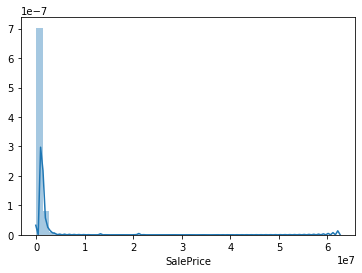

In [3]:
sns.distplot(data.SalePrice)

And here it is after:

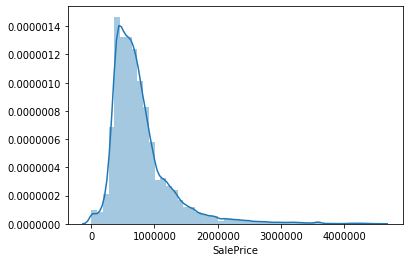

In [4]:
z = np.abs(stats.zscore(data.SalePrice))
no_outliers = data[z < 3]

sns.distplot(no_outliers.SalePrice)

In [5]:
# Overwriting the data variable with the no_outliers variable.
data = no_outliers

# 1. Airport Noise

Let's take a look at the airport noise column in out data and see how many homes suffer from airport noise.

In [6]:
data.AirportNoise.value_counts()

0    28470
Name: AirportNoise, dtype: int64

Our particular subset of data does not contain a single home that suffers from airport noise. We would need to look at a larger subset of data in order to investigate this claim further.

# 2. Traffic Noise

In [7]:
data.TrafficNoise.value_counts()

0    24509
1     2311
2     1401
3      249
Name: TrafficNoise, dtype: int64

# a. Subset the data
It looks like we do have a decent amount of homes so let's start off by splitting the data into a group with no traffic noise and a group with at least some traffic noise.

In [8]:
no_traffic = data[data['TrafficNoise']==0]
traffic = data[data['TrafficNoise']>0]

no_traffic

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,0,3027422,213043,120,2019-12-20,560000,20191226000848,,,,...,N,N,N,N,N,N,N,N,N,N
1,1,3002257,940652,630,2019-07-22,435000,20190730001339,,,,...,N,N,N,N,N,N,N,N,N,N
2,2,2993601,140281,20,2019-06-04,450000,20190614000489,,,,...,N,N,N,N,N,N,N,N,N,N
4,4,2980648,797320,2320,2019-03-27,540000,,,,,...,N,N,N,N,N,N,N,N,N,N
5,5,2980836,937630,695,2019-03-28,550000,20190404001008,,,,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28614,28614,2972689,929085,760,2019-01-25,1205000,20190206001611,,,,...,N,N,N,N,N,N,N,N,N,N
28615,28615,2992593,405940,95,2019-05-21,442000,20190607001670,,,,...,N,N,N,N,N,N,N,N,N,N
28616,28616,3003079,381670,25,2019-07-22,680000,20190802000628,,,,...,N,N,N,N,N,N,N,N,N,N
28617,28617,3025068,615020,505,2019-11-18,745000,20191212000602,,,,...,N,N,N,N,N,N,N,N,N,N


In [9]:
traffic

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
3,3,3015264,124550,98,2019-09-27,193000,20191015000395,,,,...,N,N,N,N,N,N,N,N,N,N
15,15,2972836,292205,9091,2019-02-01,400000,,,,,...,N,N,N,N,N,N,N,N,N,N
17,17,2986074,668990,20,2019-04-30,780000,20190503001148,,,,...,N,N,N,N,N,N,N,N,N,N
36,36,2992999,407320,60,2019-06-05,1495000,20190611001065,,,,...,N,N,N,N,N,N,N,N,N,N
37,37,3004196,232205,9119,2019-08-01,590000,20190809001070,,,,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28578,28578,2996393,675250,10,2019-06-24,1820000,20190628000406,,,,...,N,N,N,N,N,N,N,N,N,N
28586,28586,3025378,221300,45,2019-12-09,1075000,20191213000586,,,,...,N,N,N,N,N,N,N,N,N,N
28602,28602,3017740,386040,235,2019-10-23,1100000,20191029000733,,,,...,N,N,N,N,N,N,N,N,N,N
28608,28608,3004977,572750,100,2019-05-08,3900,20190815000438,,,,...,N,N,N,N,N,N,N,N,N,N


In [10]:
total_count = len(data)
traffic_count = len(traffic)

print(f'{round((traffic_count/total_count)*100, 2)}% of our data represents homes that suffer from traffic noise.')

13.91% of our data represents homes that suffer from traffic noise.


# b. Compare
### Median Comparison

In [11]:
traffic_med = traffic.SalePrice.median()
no_traffic_med = no_traffic.SalePrice.median()


print(f'median value of homes w/ traffic: {traffic_med}\n')
print(f'median value of homes w/o traffic: {no_traffic_med}\n')

print(f'Homes that don\'t suffer from traffic noise have a median value of about ${abs(traffic_med-no_traffic_med)} higher than homes that do suffer from traffic noise.')

median value of homes w/ traffic: 650000.0

median value of homes w/o traffic: 655000.0

Homes that don't suffer from traffic noise have a median value of about $5000.0 higher than homes that do suffer from traffic noise.


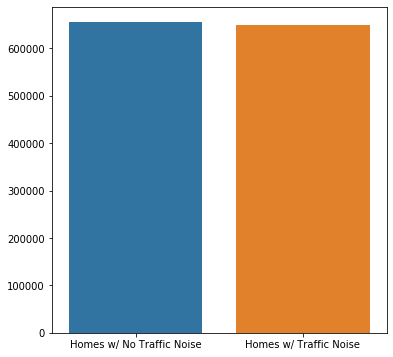

In [12]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(x=['Homes w/ No Traffic Noise', 'Homes w/ Traffic Noise'],y=[no_traffic_med, traffic_med], ax=ax)

### Mean Comparison

Out of curiosity, we'll check the mean, though this will likely be skewed because of the size difference between the data sets.

In [13]:
traffic_mean = traffic.SalePrice.mean()
no_traffic_mean = no_traffic.SalePrice.mean()
mean_dif = round(abs(traffic_mean-no_traffic_mean), 2)

print(f'Mean value of homes w/ traffic: {traffic_mean}\n')
print(f'Mean value of homes w/o traffic: {no_traffic_mean}\n')

print(f'Homes that suffer from traffic noise have a mean value of about ${mean_dif} higher than homes that don\'t suffer from traffic noise.')

Mean value of homes w/ traffic: 778932.4319616258

Mean value of homes w/o traffic: 774288.7987677996

Homes that suffer from traffic noise have a mean value of about $4643.63 higher than homes that don't suffer from traffic noise.


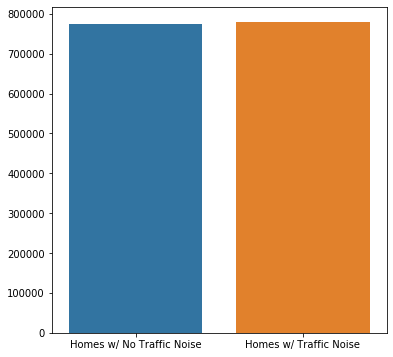

In [14]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(x=['Homes w/ No Traffic Noise', 'Homes w/ Traffic Noise'],y=[no_traffic_mean, traffic_mean], ax=ax);

### Distribution comparison

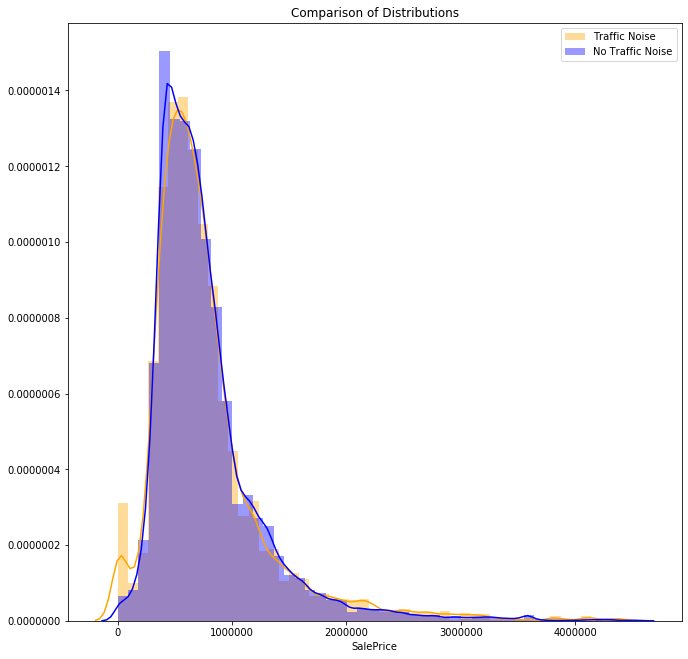

In [15]:
fig, ax = plt.subplots(1,1,figsize=(11,11))

sns.distplot(traffic.SalePrice, ax=ax, color='orange', label='Traffic Noise')
sns.distplot(no_traffic.SalePrice, ax=ax, color='blue', label='No Traffic Noise')
ax.legend()
ax.set_title('Comparison of Distributions');

In the plot above, the distribution of home prices for homes with traffic noise is shown in orange and the distribution for homes with no traffic noise is shown in blue. You can see that the distributions are nearly identical with the exception of a small spike in low valued homes that suffer from traffic noise, as indicated by the yellow bar sticking up above 0 on the x axis.

## Further investigation

Looking at the look up table, traffic noises are recorded as follows:


0. no traffic noise
1. moderate noise level
2. high noise level 
3. extreme noise level

We will repeat the process above, but with each iteration we will separate the groups differently. We will check homes that suffer from high traffic noise and homes that suffer from extreme traffic noise.

# Noise level 2 or greater

# a. Subset

In [16]:
traffic = data[data.TrafficNoise>=2]
no_traffic = data[data.TrafficNoise<2]

total_count = len(data)
traffic_count = len(traffic)

print(f'{round((traffic_count/total_count)*100, 2)}% of our data represents homes that suffer from moderate traffic noise or greater.')

5.8% of our data represents homes that suffer from moderate traffic noise or greater.


# b. Compare
### Median Comparison

In [17]:


traffic_med = traffic.SalePrice.median()
no_traffic_med = no_traffic.SalePrice.median()
mean_dif = round(abs(traffic_med-no_traffic_med), 2)

print(f'Mean value of homes w/ traffic: {traffic_med}\n')
print(f'Mean value of homes w/o traffic: {no_traffic_med}\n')

print(f'Homes that suffer don\'t from traffic noise have a mean value of about ${mean_dif} higher than homes that suffer from traffic noise.')

Mean value of homes w/ traffic: 650000.0

Mean value of homes w/o traffic: 655000.0

Homes that suffer don't from traffic noise have a mean value of about $5000.0 higher than homes that suffer from traffic noise.


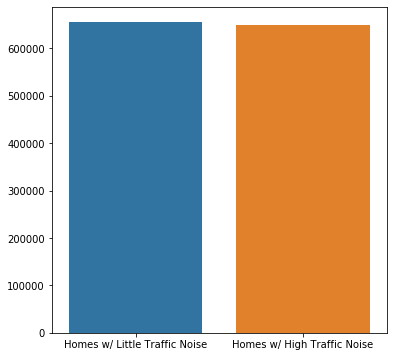

In [18]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(x=['Homes w/ Little Traffic Noise', 'Homes w/ High Traffic Noise'],y=[no_traffic_med, traffic_med], ax=ax);

### Mean Comparison

In [19]:
traffic_mean = traffic.SalePrice.mean()
no_traffic_mean = no_traffic.SalePrice.mean()
mean_dif = round(abs(traffic_mean-no_traffic_mean), 2)

print(f'Mean value of homes w/ traffic: {traffic_mean}\n')
print(f'Mean value of homes w/o traffic: {no_traffic_mean}\n')

print(f'Homes that don\'t suffer from traffic noise have a mean value of about ${mean_dif} higher than homes that suffer from traffic noise.')

Mean value of homes w/ traffic: 769172.3745454545

Mean value of homes w/o traffic: 775289.377852349

Homes that don't suffer from traffic noise have a mean value of about $6117.0 higher than homes that suffer from traffic noise.


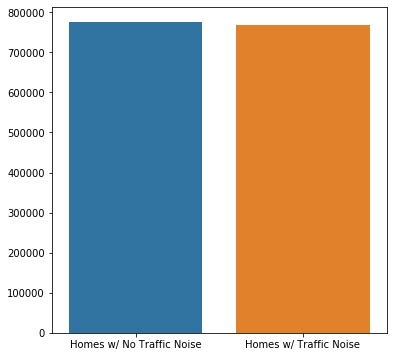

In [20]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(x=['Homes w/ No Traffic Noise', 'Homes w/ Traffic Noise'],y=[no_traffic_mean, traffic_mean], ax=ax);

### Distribution comparison

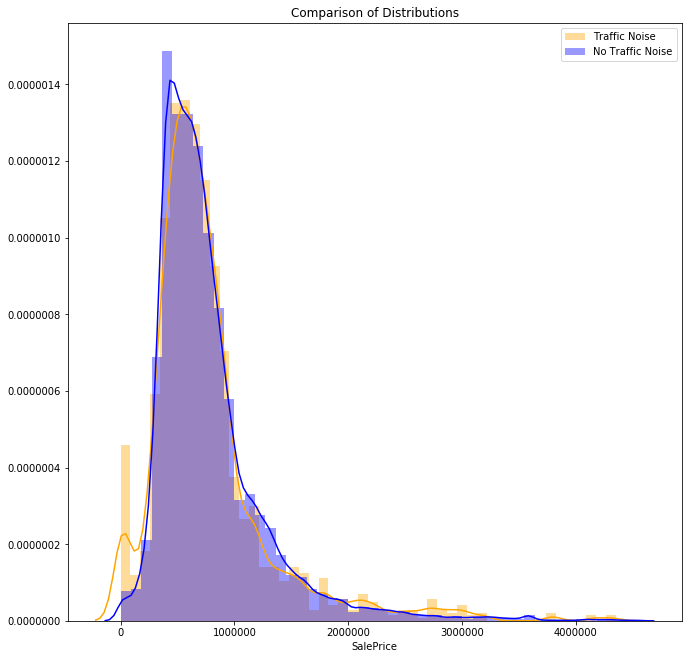

In [21]:
fig, ax = plt.subplots(1,1,figsize=(11,11))

sns.distplot(traffic.SalePrice, ax=ax, color='orange', label='Traffic Noise')
sns.distplot(no_traffic.SalePrice, ax=ax, color='blue', label='No Traffic Noise')
ax.legend()
ax.set_title('Comparison of Distributions');

# Noise level 3 or greater

# a. Subset

In [22]:
traffic = data[data.TrafficNoise>=3]
no_traffic = data[data.TrafficNoise<3]

total_count = len(data)
traffic_count = len(traffic)

print(f'{round((traffic_count/total_count)*100, 2)}% of our data represents homes that suffer from extreme traffic noise or greater.')

0.87% of our data represents homes that suffer from extreme traffic noise or greater.


# b. Compare
### Median Comparison

In [23]:
traffic_med = traffic.SalePrice.median()
no_traffic_med = no_traffic.SalePrice.median()
mean_dif = round(abs(traffic_med-no_traffic_med), 2)

print(f'Mean value of homes w/ traffic: {traffic_med}\n')
print(f'Mean value of homes w/o traffic: {no_traffic_med}\n')

print(f'Homes that suffer don\'t from traffic noise have a mean value of about ${mean_dif} higher than homes that suffer from traffic noise.')

Mean value of homes w/ traffic: 650000.0

Mean value of homes w/o traffic: 655000.0

Homes that suffer don't from traffic noise have a mean value of about $5000.0 higher than homes that suffer from traffic noise.


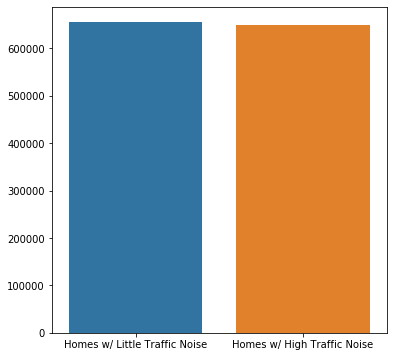

In [24]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(x=['Homes w/ Little Traffic Noise', 'Homes w/ High Traffic Noise'],y=[no_traffic_med, traffic_med], ax=ax);

### Mean Comparison

In [25]:
traffic_mean = traffic.SalePrice.mean()
no_traffic_mean = no_traffic.SalePrice.mean()
mean_dif = round(abs(traffic_mean-no_traffic_mean), 2)

print(f'Mean value of homes w/ traffic: {traffic_mean}\n')
print(f'Mean value of homes w/o traffic: {no_traffic_mean}\n')

print(f'Homes that don\'t suffer from extreme traffic noise have a mean value of about ${mean_dif} higher than homes that suffer from extreme traffic noise.')

Mean value of homes w/ traffic: 742474.3654618474

Mean value of homes w/o traffic: 775221.2683817015

Homes that don't suffer from extreme traffic noise have a mean value of about $32746.9 higher than homes that suffer from extreme traffic noise.


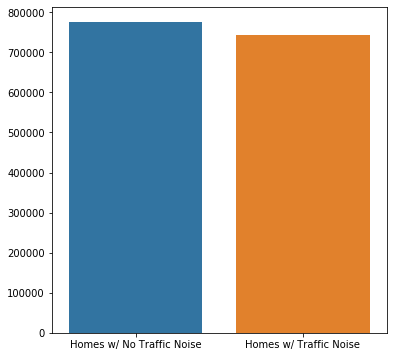

In [26]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(x=['Homes w/ No Traffic Noise', 'Homes w/ Traffic Noise'],y=[no_traffic_mean, traffic_mean], ax=ax);

### Distribution comparison

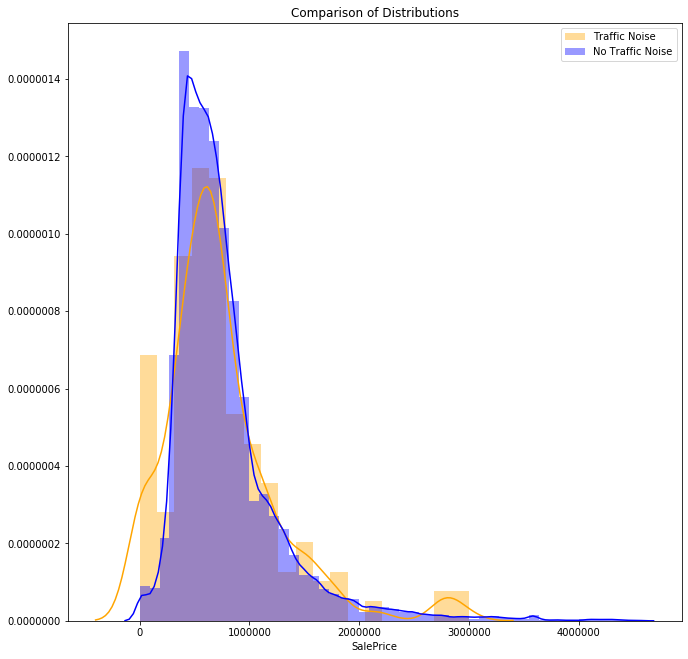

In [27]:
fig, ax = plt.subplots(1,1,figsize=(11,11))

sns.distplot(traffic.SalePrice, ax=ax, color='orange', label='Traffic Noise')
sns.distplot(no_traffic.SalePrice, ax=ax, color='blue', label='No Traffic Noise')
ax.legend()
ax.set_title('Comparison of Distributions');

# c. Test

Of the three subsets we looked at, only extreme traffic noise seems to have any sizeable effect on the mean price of family homes. We'll use a t-test to determine the statistical significance of this finding.

N<sub>0</sub>: The 2019 mean sale price of King County homes that do not suffer from extreme traffic noise is the same or lower than the 2019 mean sale price of King County homes that do suffer from extreme traffic noise

N<sub>A</sub>: The 2019 mean sale price of King County homes that do suffer from extreme traffic noise is the higher than the 2019 mean sale price of King County homes that do not suffer from extreme traffic noise

In [28]:
stats.ttest_ind(no_traffic.SalePrice, traffic.SalePrice, equal_var=False)

Ttest_indResult(statistic=0.963580785007996, pvalue=0.3361809462932931)

### P-value = 0.336
The size of the difference in means was much more noticeable than the increases seen in previous subsets. However, this could be due to this last subset being only a fraction of a percent of the original sample. The findings were found to not be statistically significant given an alpha value of .05.

# Further investigation:
If one looks at the distribution comparisons they will find that the yellow distribution, which represents homes that suffer from traffic noise, all seem to show a spike in low valued homes. We should look into the homes that constitute this spike and investigate what causes this group to stand out so much from the rest of the homes suffering from traffic noise.

# Power lines

Do we have any homes in our data set that suffer from power line nuisances?

In [29]:
data.PowerLines.value_counts()

N    28171
Y      299
Name: PowerLines, dtype: int64

# Power Lines

# a. Subset

In [30]:
power_lines = data[data.PowerLines=='Y']
no_power_lines = data[data.PowerLines=='N']

total_count = len(data)
power_lines_count = len(power_lines)

print(f'{round((power_lines_count/total_count)*100, 2)}% of our data represents homes that suffer from power line nuisances.')

1.05% of our data represents homes that suffer from power line nuisances.


# b. Compare
### Median Comparison

In [31]:
power_lines_med = power_lines.SalePrice.median()
no_power_lines_med = no_power_lines.SalePrice.median()
med_dif = round(abs(power_lines_med-no_power_lines_med), 2)

print(f'Median value of homes w/ power lines: {power_lines_med}\n')
print(f'Median value of homes w/o power lines: {no_power_lines_med}\n')

print(f'Homes that suffer don\'t from power line nuisances have a median value of about ${med_dif} higher than homes that suffer from power line nuisances.')

Median value of homes w/ power lines: 600000.0

Median value of homes w/o power lines: 655000.0

Homes that suffer don't from power line nuisances have a median value of about $55000.0 higher than homes that suffer from power line nuisances.


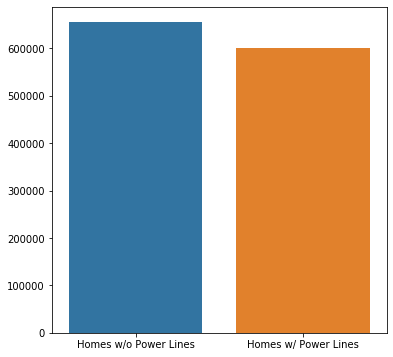

In [32]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(x=['Homes w/o Power Lines', 'Homes w/ Power Lines'],y=[no_power_lines_med, power_lines_med], ax=ax);

### Mean Comparison

In [47]:
power_lines_mean = power_lines.SalePrice.mean()
no_power_lines_mean = no_power_lines.SalePrice.mean()
mean_dif = round(abs(power_lines_mean-no_power_lines_mean), 2)

print(f'Mean value of homes w/ power lines: {power_lines_mean}\n')
print(f'Mean value of homes w/o power lines: {no_power_lines_mean}\n')

print(f'Homes that suffer don\'t from power line nuisances have a mean value of about ${mean_dif} higher than homes that suffer from traffic noise.')

Mean value of homes w/ power lines: 679553.9464882943

Mean value of homes w/o power lines: 775947.2117425721

Homes that suffer don't from power line nuisances have a mean value of about $96393.27 higher than homes that suffer from traffic noise.


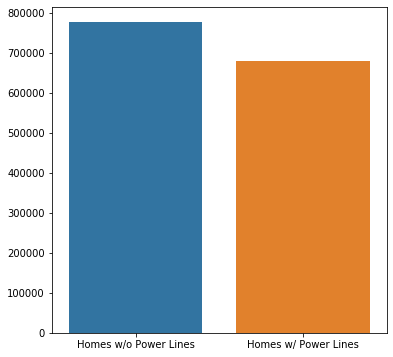

In [34]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(x=['Homes w/o Power Lines', 'Homes w/ Power Lines'],y=[no_power_lines_mean, power_lines_mean], ax=ax);

### Distribution comparison

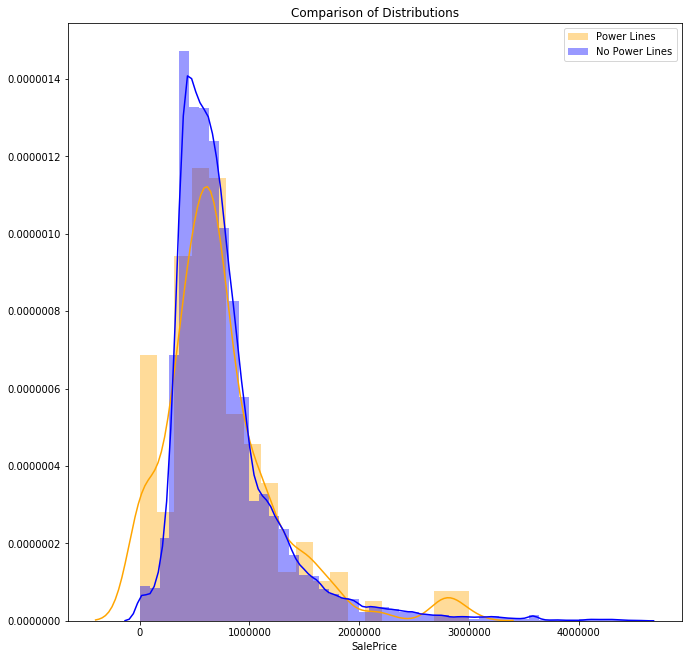

In [35]:
fig, ax = plt.subplots(1,1,figsize=(11,11))

sns.distplot(traffic.SalePrice, ax=ax, color='orange', label='Power Lines')
sns.distplot(no_traffic.SalePrice, ax=ax, color='blue', label='No Power Lines')
ax.legend()
ax.set_title('Comparison of Distributions');

# c. Test

The homes with power lines do show a significantly lower mean home sale value, so the statistical significance of this is worth investigating.

N<sub>0</sub>: The 2019 mean sale price of King County homes that do not suffer from power line nuisances is the same or lower than the 2019 mean sale price of King County homes that do suffer from power line nuisances.

N<sub>A</sub>: The 2019 mean sale price of King County homes that do suffer from power line nuisances is higher than the 2019 mean sale price of King County homes that do not suffer from power line nuisances.

In [36]:
stats.ttest_ind(no_power_lines.SalePrice, power_lines.SalePrice, equal_var=False)

Ttest_indResult(statistic=4.2549740462196795, pvalue=2.7770027790713588e-05)

### P-value = 0.0000028
The difference in means between homes with and without power lines is close to $100,000 in favor of homes without power lines. We will reject the null hypothesis that power lines have no effect given that the p-value for this sample comparison is far smaller than the alpha value of .05.

In [37]:
nuisance = no_outliers[(no_outliers.TrafficNoise>=2)|(no_outliers.PowerLines == 'Y')]

nuisance

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
36,36,2992999,407320,60,2019-06-05,1495000,20190611001065,,,,...,N,N,N,N,N,N,N,N,N,N
62,62,2980797,637950,820,2019-03-20,675000,20190404000793,,,,...,N,N,N,N,N,N,N,N,N,N
90,90,2981429,872595,140,2019-04-04,1267555,20190409000897,,,,...,N,N,N,N,N,N,N,N,N,N
104,104,2983779,691805,70,2019-04-16,886846,,,,,...,N,N,N,N,N,N,N,N,N,N
135,135,2994581,390050,120,2019-06-18,737500,,,,,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28568,28568,2982598,172304,9437,2019-03-07,550000,,,,,...,N,N,N,N,N,N,N,N,N,N
28572,28572,2985675,885692,380,2019-05-01,525000,,,,,...,N,N,N,N,N,N,N,N,N,N
28577,28577,2970466,618770,175,2019-01-14,610000,20190117000289,,,,...,N,N,N,N,N,N,N,N,N,N
28608,28608,3004977,572750,100,2019-05-08,3900,20190815000438,,,,...,N,N,N,N,N,N,N,N,N,N


In [38]:
no_nuisance = no_outliers[(no_outliers.TrafficNoise<2)&(no_outliers.PowerLines == 'N')]

no_nuisance

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,0,3027422,213043,120,2019-12-20,560000,20191226000848,,,,...,N,N,N,N,N,N,N,N,N,N
1,1,3002257,940652,630,2019-07-22,435000,20190730001339,,,,...,N,N,N,N,N,N,N,N,N,N
2,2,2993601,140281,20,2019-06-04,450000,20190614000489,,,,...,N,N,N,N,N,N,N,N,N,N
3,3,3015264,124550,98,2019-09-27,193000,20191015000395,,,,...,N,N,N,N,N,N,N,N,N,N
4,4,2980648,797320,2320,2019-03-27,540000,,,,,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28614,28614,2972689,929085,760,2019-01-25,1205000,20190206001611,,,,...,N,N,N,N,N,N,N,N,N,N
28615,28615,2992593,405940,95,2019-05-21,442000,20190607001670,,,,...,N,N,N,N,N,N,N,N,N,N
28616,28616,3003079,381670,25,2019-07-22,680000,20190802000628,,,,...,N,N,N,N,N,N,N,N,N,N
28617,28617,3025068,615020,505,2019-11-18,745000,20191212000602,,,,...,N,N,N,N,N,N,N,N,N,N


# All Nuisances

Because we found a small effect for homes with extreme traffic noise, and a large and statistically significant effect for power line nuisances, we want to see the difference between homes with either of these nuisances and homes with no nuisances.

# a. Subset

In [39]:
nuisance = data[(data.TrafficNoise>=3)|(data.PowerLines == 'Y')]
no_nuisance = data[(data.TrafficNoise<2)&(data.PowerLines == 'N')]

total_count = len(data)
nuisance_count = len(nuisance)

print(f'{round((nuisance_count/total_count)*100, 2)}% of our data represents homes that suffer from significant nuisances.')

1.92% of our data represents homes that suffer from significant nuisances.


# b. Compare
### Median Comparison

In [40]:
nuisance_med = nuisance.SalePrice.median()
no_nuisance_med = no_nuisance.SalePrice.median()
med_dif = round(abs(nuisance_med-no_nuisance_med), 2)

print(f'Median value of homes w/ nuisances: {nuisance_med}\n')
print(f'Median value of homes w/o nuisances: {no_nuisance_med}\n')

print(f'Homes that suffer don\'t from nuisances have a median value of about ${med_dif} higher than homes that suffer from nuisances.')
nuisance

Median value of homes w/ nuisances: 618000.0

Median value of homes w/o nuisances: 655888.0

Homes that suffer don't from nuisances have a median value of about $37888.0 higher than homes that suffer from nuisances.


,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
135,135,2994581,390050,120,2019-06-18,737500,,,,,...,N,N,N,N,N,N,N,N,N,N
209,209,2972270,82006,9039,2019-01-10,699000,20190131001217,,,,...,N,N,N,N,N,N,N,N,N,N
332,332,2999410,22507,9045,2019-07-13,1350000,20190715001086,,,,...,N,N,N,N,N,N,N,N,N,N
385,385,2988205,184030,280,2019-05-14,428000,20190516000840,,,,...,N,N,N,N,N,N,N,N,N,N
396,396,2972996,195181,120,2019-02-04,775000,,,,,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28364,28364,2987793,774010,25,2019-05-13,759100,20190515000668,,,,...,N,N,N,N,N,N,N,N,N,N
28459,28459,3021378,172505,9125,2019-11-15,1482000,20191119000865,,,,...,N,N,N,N,N,N,N,N,N,N
28484,28484,3005640,430730,520,2019-08-14,188000,20190819000550,,,,...,N,N,N,N,N,N,N,N,N,N
28577,28577,2970466,618770,175,2019-01-14,610000,20190117000289,,,,...,N,N,N,N,N,N,N,N,N,N


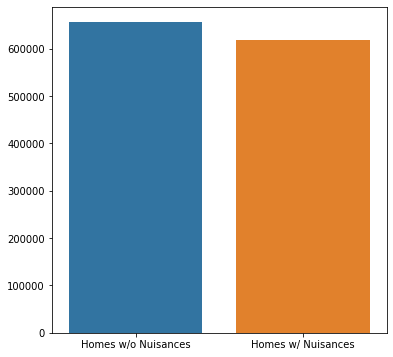

In [41]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(x=['Homes w/o Nuisances', 'Homes w/ Nuisances'],y=[no_nuisance_med, nuisance_med], ax=ax);

### Mean Comparison

In [42]:
nuisance_mean = nuisance.SalePrice.mean()
no_nuisance_mean = no_nuisance.SalePrice.mean()
mean_dif = round(abs(nuisance_mean-no_nuisance_mean), 2)

print(f'Median value of homes w/ nuisance: {nuisance_mean}\n')
print(f'Median value of homes w/o nuisance: {no_nuisance_mean}\n')

print(f'Homes that suffer don\'t from traffic noise have a mean value of about ${mean_dif} higher than homes that suffer from traffic noise.')

Median value of homes w/ nuisance: 708143.6989051095

Median value of homes w/o nuisance: 776177.5422994309

Homes that suffer don't from traffic noise have a mean value of about $68033.84 higher than homes that suffer from traffic noise.


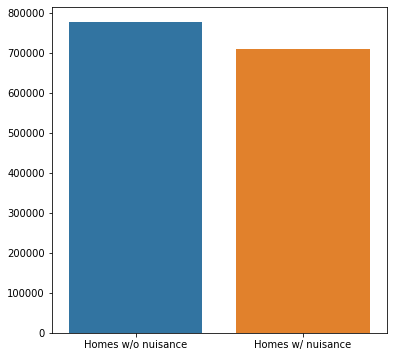

In [43]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(x=['Homes w/o nuisance', 'Homes w/ nuisance'],y=[no_nuisance_mean, nuisance_mean], ax=ax);

### Distribution comparison

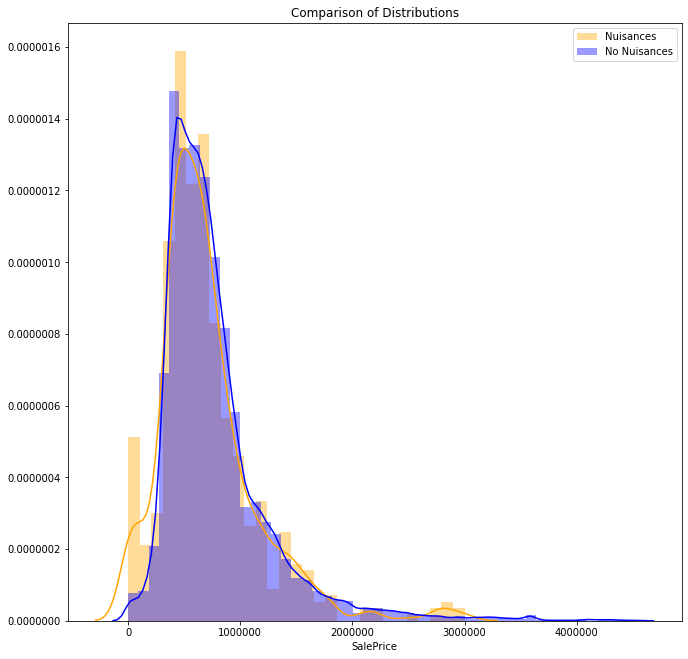

In [44]:
fig, ax = plt.subplots(1,1,figsize=(11,11))

sns.distplot(nuisance.SalePrice, ax=ax, color='orange', label='Nuisances')
sns.distplot(no_nuisance.SalePrice, ax=ax, color='blue', label='No Nuisances')
ax.legend()
ax.set_title('Comparison of Distributions');

# c. Test

The homes with any nuisances show a lower lower mean home sale value, so the statistical significance of this is worth investigating.

N<sub>0</sub>: The 2019 mean sale price of King County homes that do not suffer from nuisances is the same or lower than the 2019 mean sale price of King County homes that do suffer from nuisances.

N<sub>A</sub>: The 2019 mean sale price of King County homes that do suffer from nuisances is higher than the 2019 mean sale price of King County homes that do not suffer from nuisances.

In [45]:
stats.ttest_ind(no_nuisance.SalePrice, nuisance.SalePrice, equal_var=False)

Ttest_indResult(statistic=3.414723451176812, pvalue=0.0006836605796684605)

### P-value = 0.139
The difference in means between homes with or without nuisances is comparable to the difference found in homes with only extreme traffic noise. On top of that, our t-test indicated that this difference in means is not statistically significant, and could be due to chance.

# Conclusion

We examined three main nuisances that were hypothesized to effect home value:
- Airport noise
 - We found no entries in our data for homes that suffered from airport noise, so we could not examine this claim.

- Traffic noise
 - We found very little difference between home sale values of homes with or without verying levels of traffic noise. 
 - We did find that homes with extreme traffic noise did have much lower sale value, but this was deemed statistically insignificant and could be due to the extremely small sample size. 
 - There did seem to be a sizeable group of low valued homes that suffered from traffic noise of all levels, which warrants further investigation.

- Power lines
 - Despite a small sample size, we did find a statistically significant difference in mean sale values for homes with or without power line related nuisances. This shift was around $100,000.

- All nuisances
 - We combined the extreme traffic noise subset witht he power line subset and found that this diminished the statistical significance of any difference.
